## DFT and FFT

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from numpy.fft import rfft,irfft

3143
3143


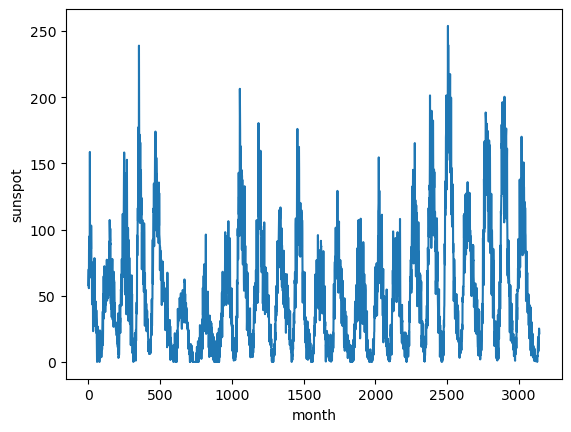

In [119]:
fname = 'sunspots.txt'
month,sunspot = np.loadtxt(fname, dtype='float', comments='#', delimiter=None,  usecols=(0,1), unpack= True)
plt.plot(month,sunspot)
plt.xlabel('month')
plt.ylabel('sunspot')
N = len(sunspot)
print(len(month))
print(N)

## DFT

In [120]:
N = len(sunspot)
########### DFT equation #########

ck= np.zeros(N//2+1,dtype = 'complex_')

for k in range(N//2 + 1):
    
    for n in range(N-1):
        ck[k] += sunspot[n]*(cmath.exp(-1j*2*np.pi*(k)*(n)/N))
        
ck = abs(np.array(ck))
print(len(ck))
# plt.plot(ck)


1572


## FFT

In [ ]:
cl = rfft(sunspot)
print(cl)
abscl = abs(cl)
plt.plot(abscl[1:])
# plt.plot(ck[1:])
plt.xlim(0,1500)
maxck = np.argmax(cl[1:]) + 1 # since we are ignoring one value intially so the index we get is k-1 and we want k
maxk = cl[maxck]


T = N/maxck
print(T/12)




## denoise 

(array([   2,    3,    4,    5,    6,    7,    8,   10,   12,   14,   16,
         17,   21,   22,   23,   28,   30,   31,   32,   37,   38,   40,
         41,   43,   44,   46,   48,   51,   52,   55,   56,   57,   58,
         59,   67,   68,   70,   72,   75,   76,   77,   78,   79,   80,
         85,   86,   87,   88,   91,   92,   93,   94,   96,   99,  100,
        101,  102,  103,  104,  105,  106,  109,  111,  112,  113,  114,
        117,  119,  120,  122,  128,  130,  131,  132,  133,  134,  137,
        139,  140,  141,  147,  150,  152,  153,  156,  157,  158,  159,
        160,  162,  164,  165,  166,  169,  170,  171,  174,  179,  180,
        182,  183,  184,  186,  191,  192,  195,  196,  198,  199,  200,
        201,  203,  204,  205,  206,  208,  209,  211,  212,  213,  214,
        217,  219,  220,  221,  222,  224,  226,  232,  233,  235,  236,
        237,  240,  241,  242,  245,  247,  248,  253,  254,  255,  256,
        258,  259,  260,  262,  263,  264,  266,  

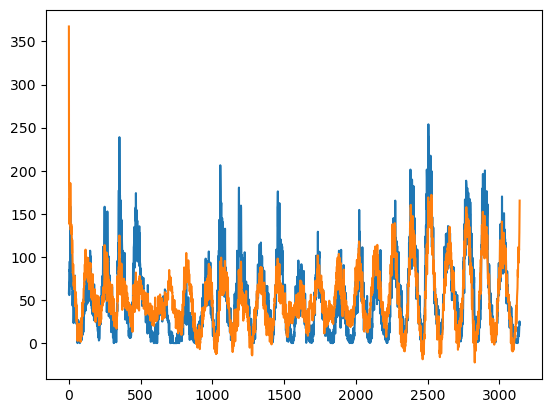

In [141]:
######## denoise ##########
threshold = 3000
indices=np.where(cl < 100)
print(indices)

for i in indices:
    cl[i] = 0.

filtered =irfft(cl)
plt.plot(sunspot)
plt.plot(filtered)